<center>
<img src="https://habrastorage.org/files/fd4/502/43d/fd450243dd604b81b9713213a247aa20.jpg">
## Open Machine Learning Course
<center>Author: [Yury Kashnitsky](https://www.linkedin.com/in/festline/), Data Scientist at Mail.ru Group <br>
    All content is distributed under the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license.
You may use this material for any purpose (you can edit, correct and use it as example) exept commercial use with mandatory citation of author.

# <center> Assignment #6 (demo).
## <center>  Exploring OLS, Lasso and Random Forest in a regression task
    
<img src=https://habrastorage.org/webt/-h/ns/aa/-hnsaaifymavmmudwip9imcmk58.jpeg width=30%>

**Fill in the missing code and choose answers in [this](https://docs.google.com/forms/d/1aHyK58W6oQmNaqEfvpLTpo6Cb0-ntnvJ18rZcvclkvw/edit) web form.**

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, LassoCV, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import (GridSearchCV, cross_val_score,
                                     train_test_split)
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

**We are working with UCI Wine quality dataset (no need to download it – it's already there, in course repo and in Kaggle Dataset).**

In [119]:
data = pd.read_csv('../../data/winequality-white.csv', sep=';')

In [120]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


**Separate the target feature, split data in 7:3 proportion (30% form a holdout set, use random_state=17), and preprocess data with `StandardScaler`.**

In [122]:
y = data['quality']
X = data.drop('quality', axis=1)

X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state=17)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.transform(X_holdout)

## Linear regression

**Train a simple linear regression model (Ordinary Least Squares).**

In [123]:
linreg = LinearRegression(n_jobs=-1)
linreg.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


**<font color='red'>Question 1:</font> What are mean squared errors of model predictions on train and holdout sets?**

In [191]:
MSE_linreg_train = round(mean_squared_error(y_train, linreg.predict(X_train_scaled)), 3)
MSE_linreg_holdout = round(mean_squared_error(y_holdout, linreg.predict(X_holdout_scaled)), 3)

MSE_linreg_cv = np.abs(
    cross_val_score(linreg, X_train_scaled, y_train, n_jobs=-1, scoring="neg_mean_squared_error")
).mean()

print(f"Mean squared error (train): {MSE_linreg_train:.3f}")
print(f"Mean squared error (cv): {MSE_linreg_cv:.3f}")
print(f"Mean squared error (test): {MSE_linreg_holdout:.3f}")

Mean squared error (train): 0.558
Mean squared error (cv): 0.560
Mean squared error (test): 0.584


**Sort features by their influence on the target feature (wine quality). Beware that both large positive and large negative coefficients mean large influence on target. It's handy to use `pandas.DataFrame` here.**

**<font color='red'>Question 2:</font> Which feature this linear regression model treats as the most influential on wine quality?**

In [125]:
linreg_coef = pd.DataFrame({"coeficient": linreg.coef_}, index=X_train.columns)
linreg_coef.sort_values(by="coeficient", ascending=False, key=lambda coef: abs(coef), inplace=True)

linreg_coef.head(1)

,coeficient
density,-0.66572


## Lasso regression

**Train a LASSO model with $\alpha = 0.01$ (weak regularization) and scaled data. Again, set random_state=17.**

In [126]:
lasso1 = Lasso(alpha=0.01, random_state=17)
lasso1.fit(X_train_scaled, y_train)

,alpha,0.01
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,17
,selection,'cyclic'


**Which feature is the least informative in predicting wine quality, according to this LASSO model?**

In [139]:
lasso1_coef = pd.DataFrame({"coeficient": lasso1.coef_}, index=X_train.columns)
lasso1_coef.sort_values(by="coeficient", ascending=False, key=lambda coef: abs(coef), inplace=True)

lasso1_coef.tail(1)

,coeficient
total sulfur dioxide,-0.0


In [192]:
MSE_lasso_train = mean_squared_error(y_train, lasso1.predict(X_train_scaled))
MSE_lasso_holdout = mean_squared_error(y_holdout, lasso1.predict(X_holdout_scaled))

MSE_lasso_cv = np.abs(
    cross_val_score(lasso1, X_train_scaled, y_train, n_jobs=-1, scoring="neg_mean_squared_error")
).mean()

print(f"Mean squared error (train): {MSE_lasso_train:.3f}")
print(f"Mean squared error (cv): {MSE_lasso_holdout:.3f}")
print(f"Mean squared error (test): {MSE_lasso_cv:.3f}")

Mean squared error (train): 0.564
Mean squared error (cv): 0.574
Mean squared error (test): 0.566


**Train LassoCV with random_state=17 to choose the best value of $\alpha$ in 5-fold cross-validation.**

In [147]:
alphas = np.logspace(-6, 2, 200)
lasso_cv = LassoCV(alphas=alphas, random_state=17, cv=5)
lasso_cv.fit(X_train_scaled, y_train)

lasso_cv.alpha_

np.float64(0.0002833096101839324)

**<font color='red'>Question 3:</font> Which feature is the least informative in predicting wine quality, according to the tuned LASSO model?**

In [149]:
lasso_cv_coef = pd.DataFrame({"coeficient": lasso_cv.coef_}, index=X_train.columns)
lasso_cv_coef.sort_values(by="coeficient", ascending=False, key=lambda coef: abs(coef), inplace=True)

lasso_cv_coef.tail(1)

,coeficient
citric acid,-0.0


**<font color='red'>Question 4:</font> What are mean squared errors of tuned LASSO predictions on train and holdout sets?**

In [186]:
MSE_lassoCV_train = mean_squared_error(y_train, lasso_cv.predict(X_train_scaled))
MSE_lassoCV_holdout = mean_squared_error(y_holdout, lasso_cv.predict(X_holdout_scaled))

best_alpha_idx = np.where(lasso_cv.alphas_ == lasso_cv.alpha_)[0][0]
MSE_lassoCV_best_cv = lasso_cv.mse_path_.mean(axis=1)[best_alpha_idx]


print(f"Mean squared error (train): {MSE_lassoCV_train:.3f}")
print(f"Mean squared error (cv) at best alpha : {MSE_lassoCV_best_cv:.3f}")
print(f"Mean squared error (test): {MSE_lassoCV_holdout:.3f}")

Mean squared error (train): 0.558
Mean squared error (cv) at best alpha : 0.560
Mean squared error (test): 0.583


## Random Forest

**Train a Random Forest with out-of-the-box parameters, setting only random_state to be 17.**

In [152]:
forest = RandomForestRegressor(random_state=17)
forest.fit(X_train_scaled, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


**<font color='red'>Question 5:</font> What are mean squared errors of RF model on the training set, in cross-validation (cross_val_score with scoring='neg_mean_squared_error' and other arguments left with default values) and on holdout set?**

In [179]:
MSE_RF_train = mean_squared_error(y_train, forest.predict(X_train_scaled))
MSE_RF_cv = np.abs(cross_val_score(forest, X_train_scaled, y_train, scoring="neg_mean_squared_error")).mean()
MSE_RF_holdout = mean_squared_error(y_holdout, forest.predict(X_holdout_scaled))

print(f"Mean squared error (train): {MSE_RF_train:.3f}")
print(f"Mean squared error (cv): {MSE_RF_cv:.3f}")
print(f"Mean squared error (test): {MSE_RF_holdout:.3f}")

Mean squared error (train): 0.053
Mean squared error (cv): 0.414
Mean squared error (test): 0.372


**Tune the `max_features` and `max_depth` hyperparameters with GridSearchCV and again check mean cross-validation MSE and MSE on holdout set.**

In [165]:
forest_params = {"max_depth": list(range(10, 25)), "max_features": list(range(6, 12))}


locally_best_forest = GridSearchCV(
    RandomForestRegressor(n_jobs=-1, random_state=17),
    param_grid=forest_params,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1)

locally_best_forest.fit(X_train_scaled, y_train)

,estimator,RandomForestR...ndom_state=17)
,param_grid,"{'max_depth': [10, 11, ...], 'max_features': [6, 7, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [166]:
locally_best_forest.best_params_, locally_best_forest.best_score_

({'max_depth': 21, 'max_features': 6}, np.float64(0.4939384585901731))

**<font color='red'>Question 6:</font> What are mean squared errors of tuned RF model in cross-validation (cross_val_score with scoring='neg_mean_squared_error' and other arguments left with default values) and on holdout set?**

In [180]:
MSE_tuned_RF_train = mean_squared_error(
    y_train,
    locally_best_forest.predict(X_train_scaled)
)

MSE_tuned_RF_cv = np.abs(
    cross_val_score(
        locally_best_forest.best_estimator_,
        X_train_scaled,
        y_train,
        scoring="neg_mean_squared_error")
    ).mean()

MSE_tuned_RF_holdout = mean_squared_error(
    locally_best_forest.predict(X_holdout_scaled),
    y_holdout)

print(f"Mean squared error (train): {MSE_tuned_RF_train:.3f}")
print(f"Mean squared error (cv): {MSE_tuned_RF_cv:.3f}")
print(f"Mean squared error (test): {MSE_tuned_RF_holdout:.3f}")

Mean squared error (train): 0.054
Mean squared error (cv): 0.398
Mean squared error (test): 0.366


**Output RF's feature importance. Again, it's nice to present it as a DataFrame.**<br>
**<font color='red'>Question 7:</font> What is the most important feature, according to the Random Forest model?**

In [178]:
rf_importance = pd.DataFrame(
    {"coeficient": locally_best_forest.best_estimator_.feature_importances_},
    index=X_train.columns)

rf_importance.sort_values(by="coeficient", ascending=False, key=lambda coef: abs(coef), inplace=True)

rf_importance.head(1)

,coeficient
alcohol,0.206056


**Make conclusions about the performance of the explored 3 models in this particular prediction task.**

In [206]:
data = {
    'Model': ['Linear Regression', 'Lasso', 'Lasso (Tuned)', 'Random Forest', 'Random Forest (Tuned)'],
    'Train MSE': [MSE_linreg_train, MSE_lasso_train, MSE_lassoCV_train, MSE_RF_train, MSE_tuned_RF_train],
    'CV MSE': [MSE_linreg_cv, MSE_lasso_cv, MSE_lassoCV_best_cv, MSE_RF_cv, MSE_tuned_RF_cv],
    'Test MSE': [MSE_linreg_holdout, MSE_lasso_holdout, MSE_lassoCV_holdout, MSE_RF_holdout, MSE_tuned_RF_holdout]
}

results = pd.DataFrame(data)
results.set_index('Model', inplace=True)

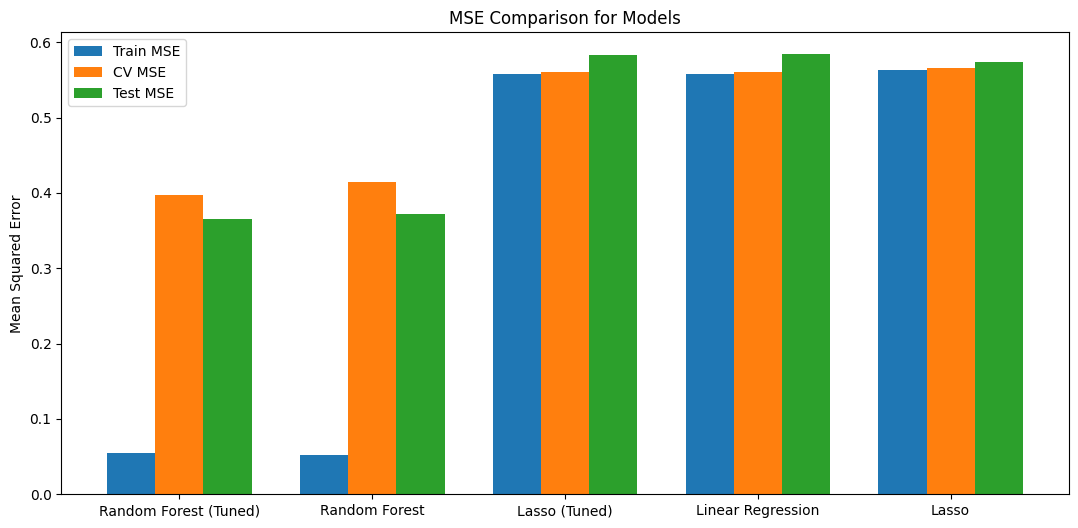

In [233]:
labels = results.index
train_mse = results['Train MSE']
cv_mse = results['CV MSE']
test_mse = results['Test MSE']

x = np.arange(len(labels))
width = 0.25

_, ax = plt.subplots(figsize=(13,6))

ax.bar(x - width, train_mse, width, label='Train MSE')
ax.bar(x, cv_mse, width, label='CV MSE')
ax.bar(x + width, test_mse, width, label='Test MSE')

ax.set_ylabel('Mean Squared Error')
ax.set_title('MSE Comparison for Models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


In [208]:
results.sort_values('CV MSE', inplace=True)

print(results.head())

                       Train MSE    CV MSE  Test MSE
Model                                               
Random Forest (Tuned)   0.054267  0.397733  0.365725
Random Forest           0.052612  0.414200  0.371638
Lasso (Tuned)           0.558070  0.560446  0.583298
Linear Regression       0.558000  0.560456  0.584000
Lasso                   0.563787  0.565633  0.573663


**According to these results, a few conclusions can be made:**

1. Random Forest models have much lower MSE across Training, Cross-validation and Test datasets in comparison with the Linear Models.
2. Tuning the models slightly helped to bring down the MSE.
3. Linear Models all performed similarly, their Train, CV, Test MSE were almost identical.
4. The gap between Train and CV, Test MSE was small, which shows that they were not overfitted.
5. The most accurate model was Tuned Random Forest.